In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [95]:
df = pd.read_excel('owen.xlsx')
df

,title,year,wows,budget,world_gross,av_rating,num_rating,genre,rated
0,Bottle Rocket,1996,3,7.0,560069,7.0,65433,Comedy,R
1,The Cable Guy,1996,0,47.0,102825796,6.1,144152,Comedy,PG-13
2,Anaconda,1997,0,45.0,136885767,4.8,89487,Action,PG-13
3,Armageddon,1998,0,140.0,553709788,6.7,377604,Action,PG-13
4,Permanent Midnight,1998,0,NaN,1171001,6.3,6678,Drama,R
5,Minus Man,1999,0,NaN,370668,6.1,6106,Drama,R
6,The Haunting,1999,5,80.0,177311151,5.0,68145,Horror,PG-13
7,Breakfast of Champions,1999,1,12.0,178278,4.6,7393,Comedy,R
8,Shanghai Noon,2000,1,55.0,99274467,6.5,113843,Action,PG-13
9,Meet the Parents,2000,2,55.0,330444045,7.0,297035,Comedy,PG-13


In [118]:
df.groupby('rated').median()

,year,wows,budget,world_gross,av_rating,num_rating,said_wow,profited
rated,,,,,,,,
G,2011,6,175.0,461983149,6.7,144851,1,1
PG,2010,1,55.0,255743093,6.2,119042,1,1
PG-13,2004,1,54.0,93492844,5.9,95635,1,1
R,2007,1,21.0,35078918,6.9,115334,1,1


In [59]:
df.groupby('rated').count()

,title,year,wows,budget,world_gross,av_rating,num_rating,genre
rated,,,,,,,,
G,4,4,4,3,4,4,4,4
NR,1,1,1,0,1,1,1,1
PG,9,9,9,9,9,9,9,9
PG-13,23,23,23,23,23,23,23,23
R,15,15,15,11,15,15,15,15


In [117]:
df.groupby(['genre','rated'])['wows'].sum()

genre      rated
Action     PG-13     9
           R         2
Animation  G        17
           PG        3
Comedy     PG       14
           PG-13    31
           R        19
Drama      PG        0
           PG-13     0
           R         0
Horror     PG-13     5
Name: wows, dtype: int64

In [108]:
tf = df.set_index('title')
tf.groupby('genre')['wows'].sum()

genre
Action       11
Animation    20
Comedy       64
Drama         0
Horror        5
Name: wows, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0FAFF67F0>,
      dtype=object)

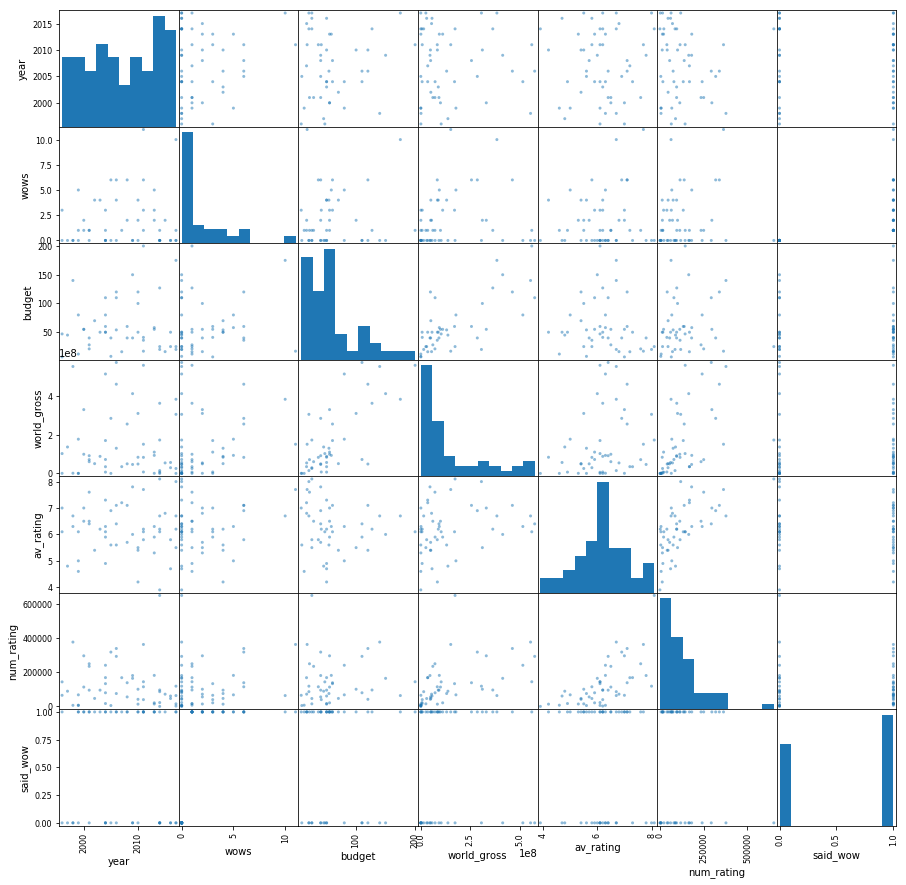

In [84]:
scatter_matrix(df, figsize=(15,15))

In [100]:
df['said_wow'] = (df['wows']>0).astype(int)
df = df.dropna()
df['profited'] = ((df['budget']*1e6)<df['world_gross']).astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
df.groupby('profited').mean().T

profited,0,1
year,2004.9,2.007583e+03
wows,1.2,2.444444e+00
budget,48.8,6.417222e+01
world_gross,23624174.2,2.065242e+08
av_rating,5.9,6.341667e+00
num_rating,56067.4,1.652452e+05
said_wow,0.5,6.666667e-01


In [102]:
df['profited'].mean()

0.782608695652174

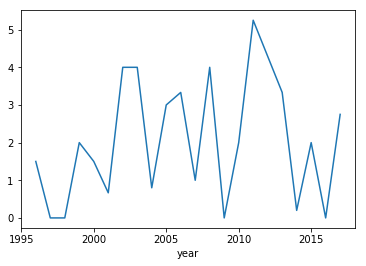

In [89]:
df.groupby('year')['wows'].mean().plot()

In [107]:
df.groupby(['genre'])['wows'].sum()

genre
Action       11
Animation    20
Comedy       64
Drama         0
Horror        5
Name: wows, dtype: int64

In [ ]:
# df.groupby('year')['av_rating'].mean().plot()

In [105]:
[str(x) for x in range(1996, 2018, 1)]

['1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [113]:
comedy = df[df['genre']=='Comedy']
action = df[df['genre']=='Action']
drama = df[df['genre']=='Drama']
animation = df[df['genre']=='Animation']
horror = df[df['genre']=='Horror']
items = [comedy, action, drama, horror, animation]

In [115]:
output = []
for item in items:
    data = []
    for row in item.values:
        temp = {}
        temp['name'] = row[0]
        temp['value'] = row[4]
        data.append(temp)
    output.append({
        'name': item['genre'].iloc[0],
        'data': data
    })

In [116]:
output

[{'name': 'Comedy',
  'data': [{'name': 'Bottle Rocket', 'value': 560069},
   {'name': 'The Cable Guy', 'value': 102825796},
   {'name': 'Breakfast of Champions', 'value': 178278},
   {'name': 'Meet the Parents', 'value': 330444045},
   {'name': 'Zoolander', 'value': 60780981},
   {'name': 'The Royal Tenenbaums', 'value': 71441250},
   {'name': 'Starsky and Hutch', 'value': 170268750},
   {'name': 'The Big Bounce', 'value': 6801716},
   {'name': 'Meet the Fockers', 'value': 514837517},
   {'name': 'Weddin Crashers', 'value': 285176741},
   {'name': 'The Wendell Baker Story', 'value': 153169},
   {'name': 'You, Me and Dupree', 'value': 130431368},
   {'name': 'Night at the Museum', 'value': 574480841},
   {'name': 'The Darjeeling Limited', 'value': 35078918},
   {'name': 'Drillbit Taylor', 'value': 49690625},
   {'name': 'Marley and Me', 'value': 255743093},
   {'name': 'Night at the Museum: Battle of the Smithsonian',
    'value': 413106170},
   {'name': 'Marmaduke', 'value': 83761844}